Data exploration and processing

In [34]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [35]:
dataset_path = "/content/aerofit_treadmill_data.csv"
aerofit_df = pd.read_csv(dataset_path)

In [36]:
# Reading dataframe
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [37]:
# Shape of the dataframe
aerofit_df.shape

(180, 9)

In [38]:
# Name of each column in dataframe
aerofit_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [39]:
# Datatype of each column in dataframe
aerofit_df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [40]:
aerofit_df['Product'] = aerofit_df['Product'].astype('category')
aerofit_df['Gender'] = aerofit_df['Gender'].astype('category')
aerofit_df['MaritalStatus'] = aerofit_df['MaritalStatus'].astype('category')

In [41]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [42]:
# Calculate skewness for numerical columns only
aerofit_df.select_dtypes(include=np.number).skew()

,0
Age,0.982161
Education,0.622294
Usage,0.739494
Fitness,0.454800
Income,1.291785
Miles,1.724497


**Statistical Summary**

In [43]:
aerofit_df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Observations:

There are no missing values in the data.

There are 3 unique products in the dataset.
KP281 is the most frequent product.

Minimum & Maximum age of the person is 18 & 50, mean is 28.79, and 75% of persons have an age less than or equal to 33.

Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.

Out of 180 data points, 104's gender is Male and rest are the Female.

Standard deviation for Income & Miles is very high.

These variables might have outliers in them

In [44]:
# Missing value detection
aerofit_df.isna().sum() # No missing values detected in DataFrame

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [45]:
# Checking duplicate values in the dataset
aerofit_df.duplicated(subset=None,keep='first').sum() # No duplicate values in the dataset

np.int64(0)

**Non-Graphical Analysis**

Value Counts

In [46]:
aerofit_df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [47]:
aerofit_df["Gender"].value_counts()

,count
Gender,
Male,104
Female,76


In [48]:
aerofit_df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


Unique Attributes

In [49]:
aerofit_df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [50]:
aerofit_df["Product"].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [51]:
aerofit_df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [52]:
aerofit_df["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [53]:
aerofit_df["Education"].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [54]:
aerofit_df["MaritalStatus"].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [55]:
aerofit_df["Usage"].unique()

array([3, 2, 4, 5, 6, 7])

In [56]:
aerofit_df["Income"].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [57]:
aerofit_df["Fitness"].unique()

array([4, 3, 2, 1, 5])

In [58]:
aerofit_df["Miles"].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

**Graphical Analysis**

**Univariate Analysis - Numerical Variables**


Distance Plot

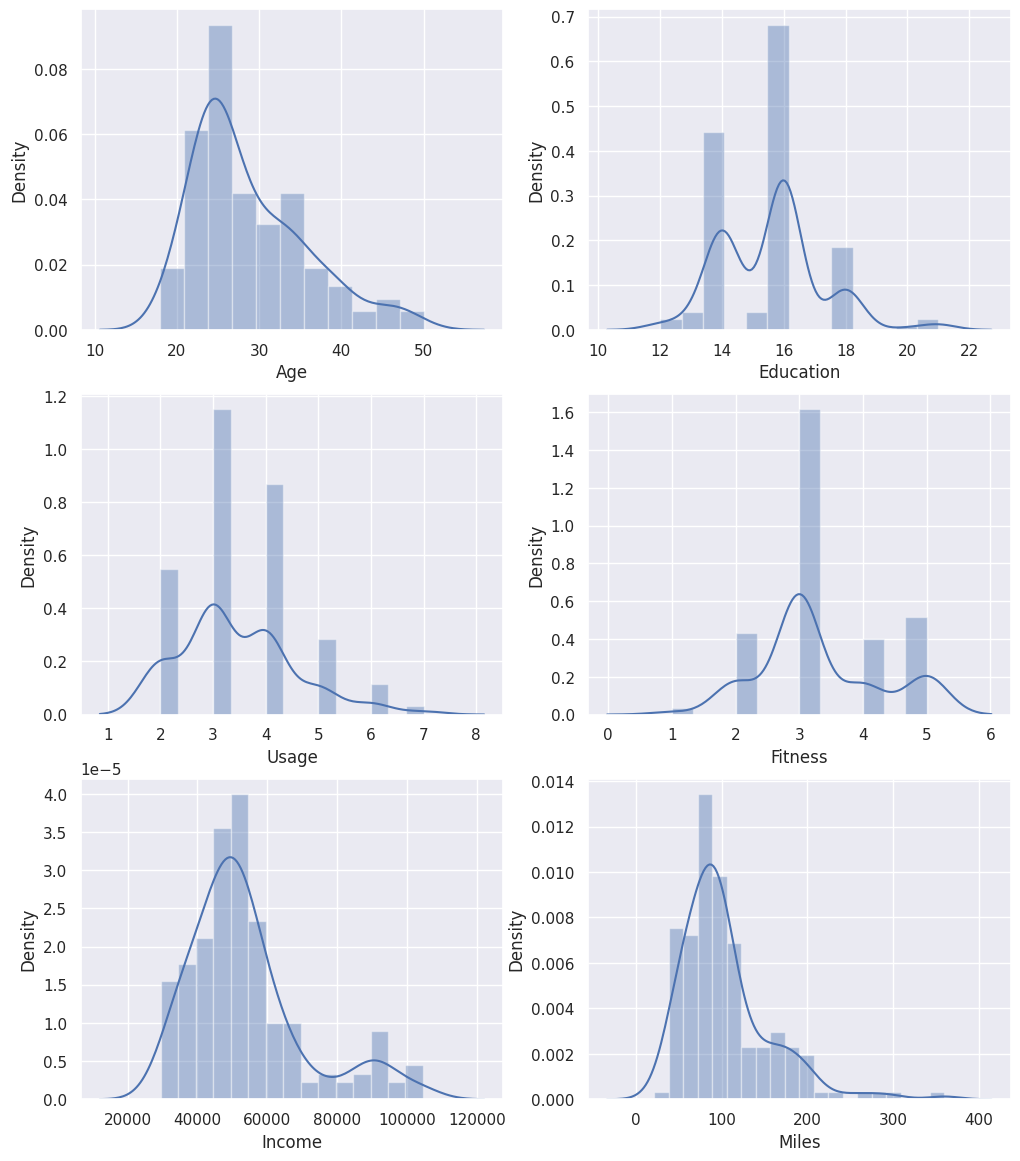

In [59]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.distplot(aerofit_df['Age'], kde=True, ax=axis[0,0])
sns.distplot(aerofit_df['Education'], kde=True, ax=axis[0,1])
sns.distplot(aerofit_df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(aerofit_df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(aerofit_df['Income'], kde=True, ax=axis[2,0])
sns.distplot(aerofit_df['Miles'], kde=True, ax=axis[2,1])
plt.show()

Observations:

Both Miles and Income have significant outliers based on the above distribution.

Also Miles and Income are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

Customer with fitness level 3 buy a major chuck of treadmills.

Majority of Customers fall within the $ 45,000 - $ 60,000 income range

**Count Plo**t

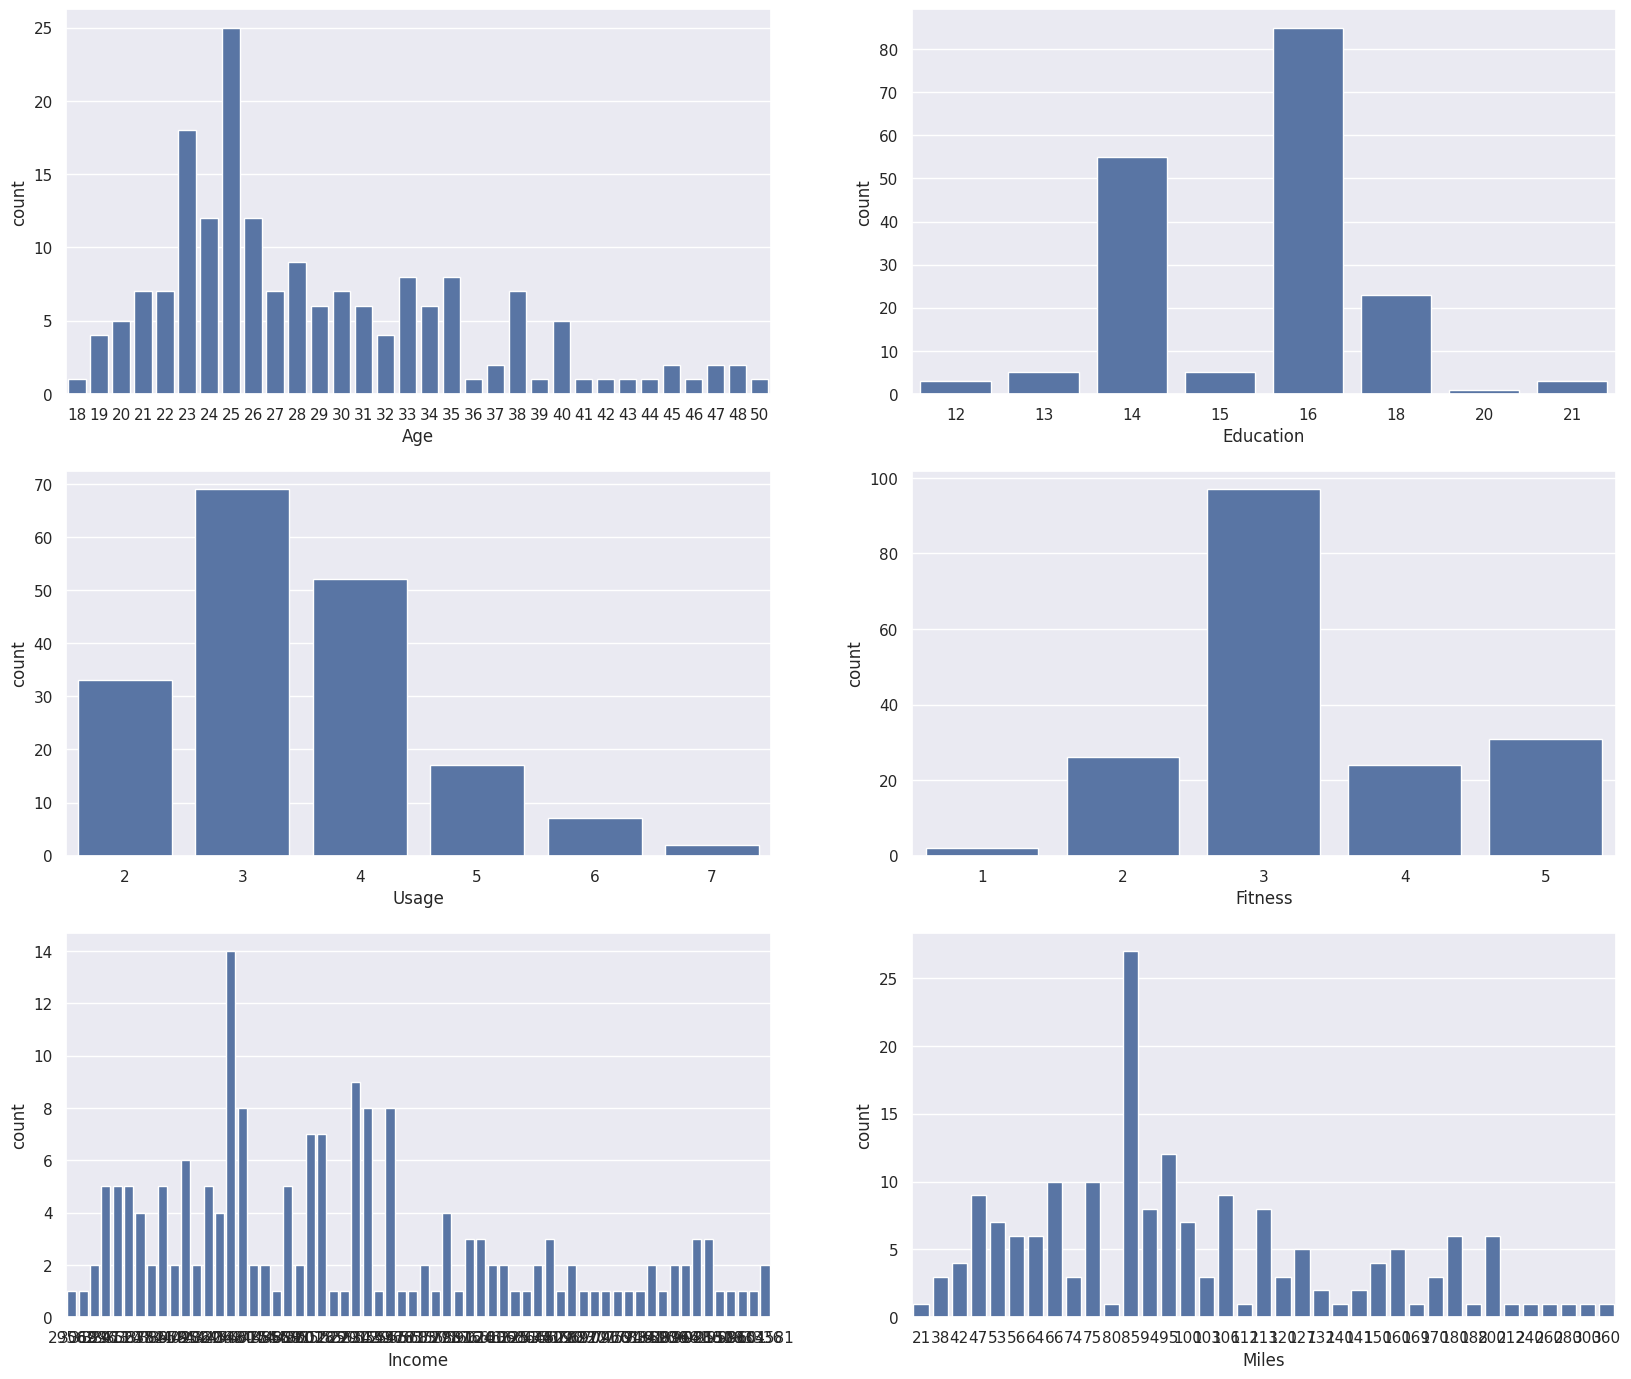

In [60]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=aerofit_df, x="Age", ax=axis[0,0])
sns.countplot(data=aerofit_df, x="Education", ax=axis[0,1])
sns.countplot(data=aerofit_df, x="Usage", ax=axis[1,0])
sns.countplot(data=aerofit_df, x="Fitness", ax=axis[1,1])
sns.countplot(data=aerofit_df, x="Income", ax=axis[2,0])
sns.countplot(data=aerofit_df, x="Miles", ax=axis[2,1])
plt.show()

**Observations:**

Young people at age of 25 are more conscious about health and are using treadmills more than old aged people

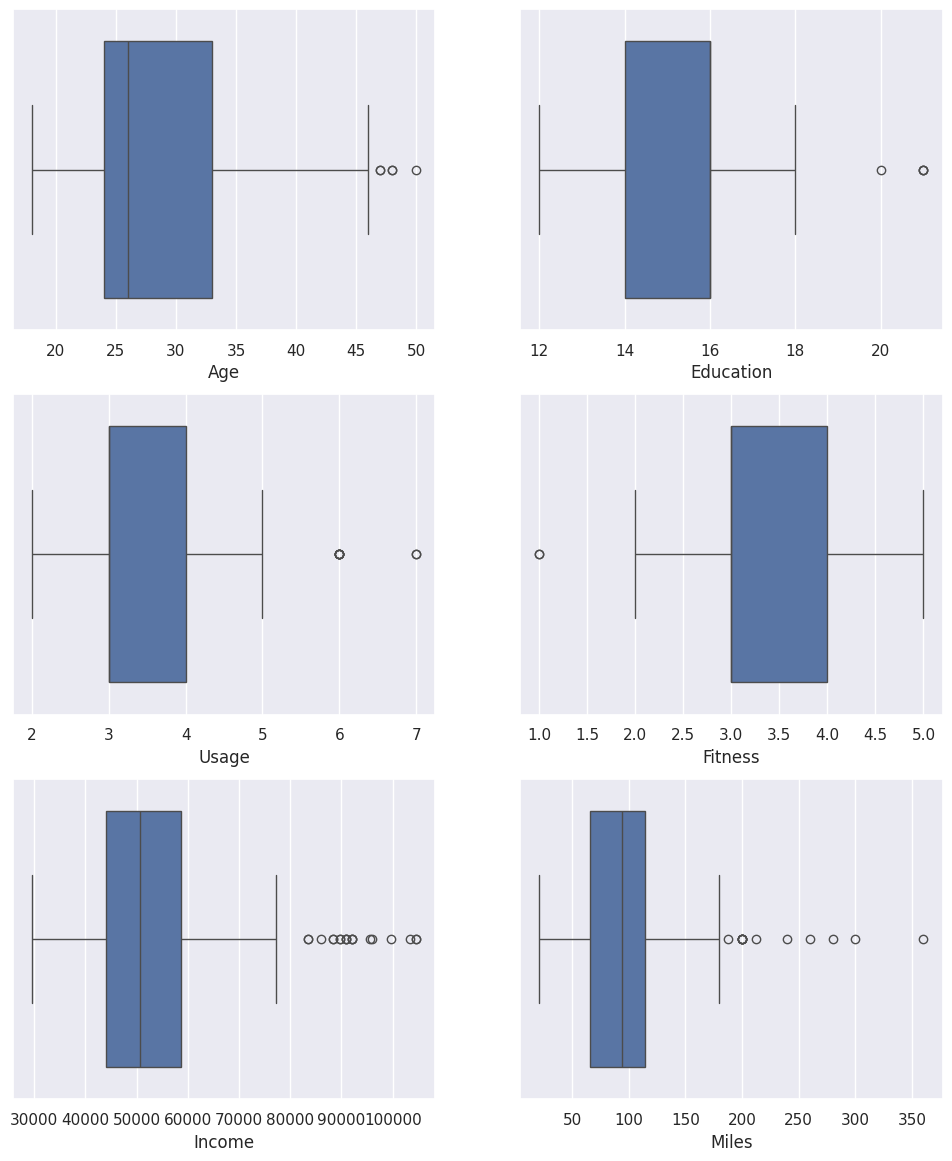

In [61]:
# Box Plot
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit_df, x='Age', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x='Education', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x='Usage', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x='Fitness', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x='Income', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x='Miles', ax=axis[2,1])
plt.show()

**Observations:**

Age, Education, and Usage have very few outliers.


While Income and Miles have more outliers.

**Univariate Analysis - Categorical Variables**


Count Plot

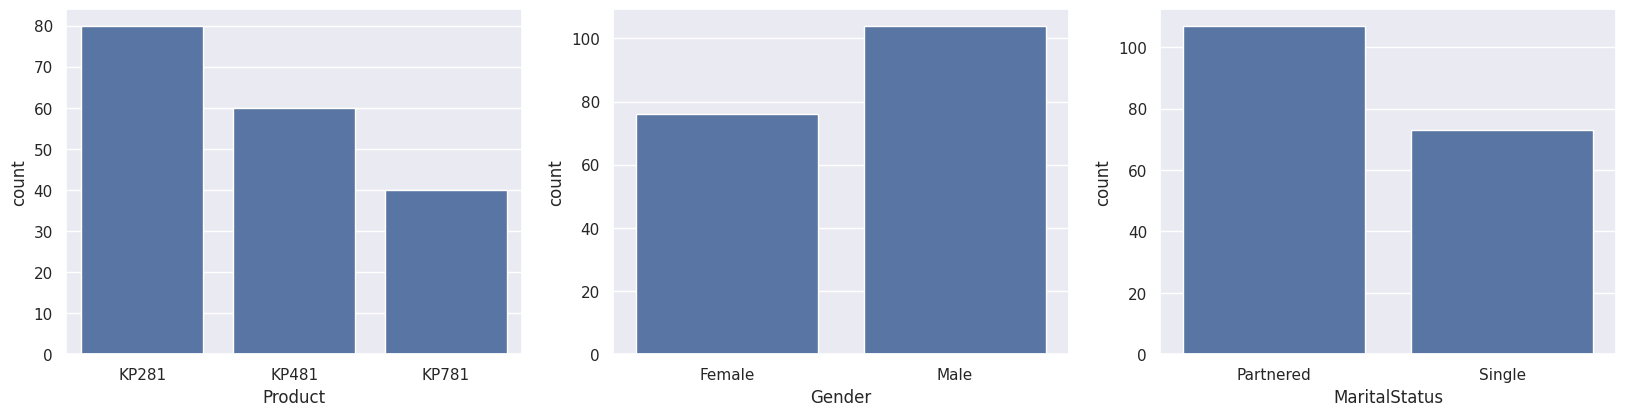

In [62]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.subplots_adjust(top=0.8)

sns.countplot(data=aerofit_df, x="Product", ax=axis[0])
sns.countplot(data=aerofit_df, x="Gender", ax=axis[1])
sns.countplot(data=aerofit_df, x="MaritalStatus", ax=axis[2])
plt.show()

**Observations**

KP281 is the most frequent product and best-selling product.

In Gender, there are more Males who are using treadmills than Females.

The treadmills are more likely to be purchased by partnered people

**Bivariate Analysis**

Checking if features have any effect on the product purchased

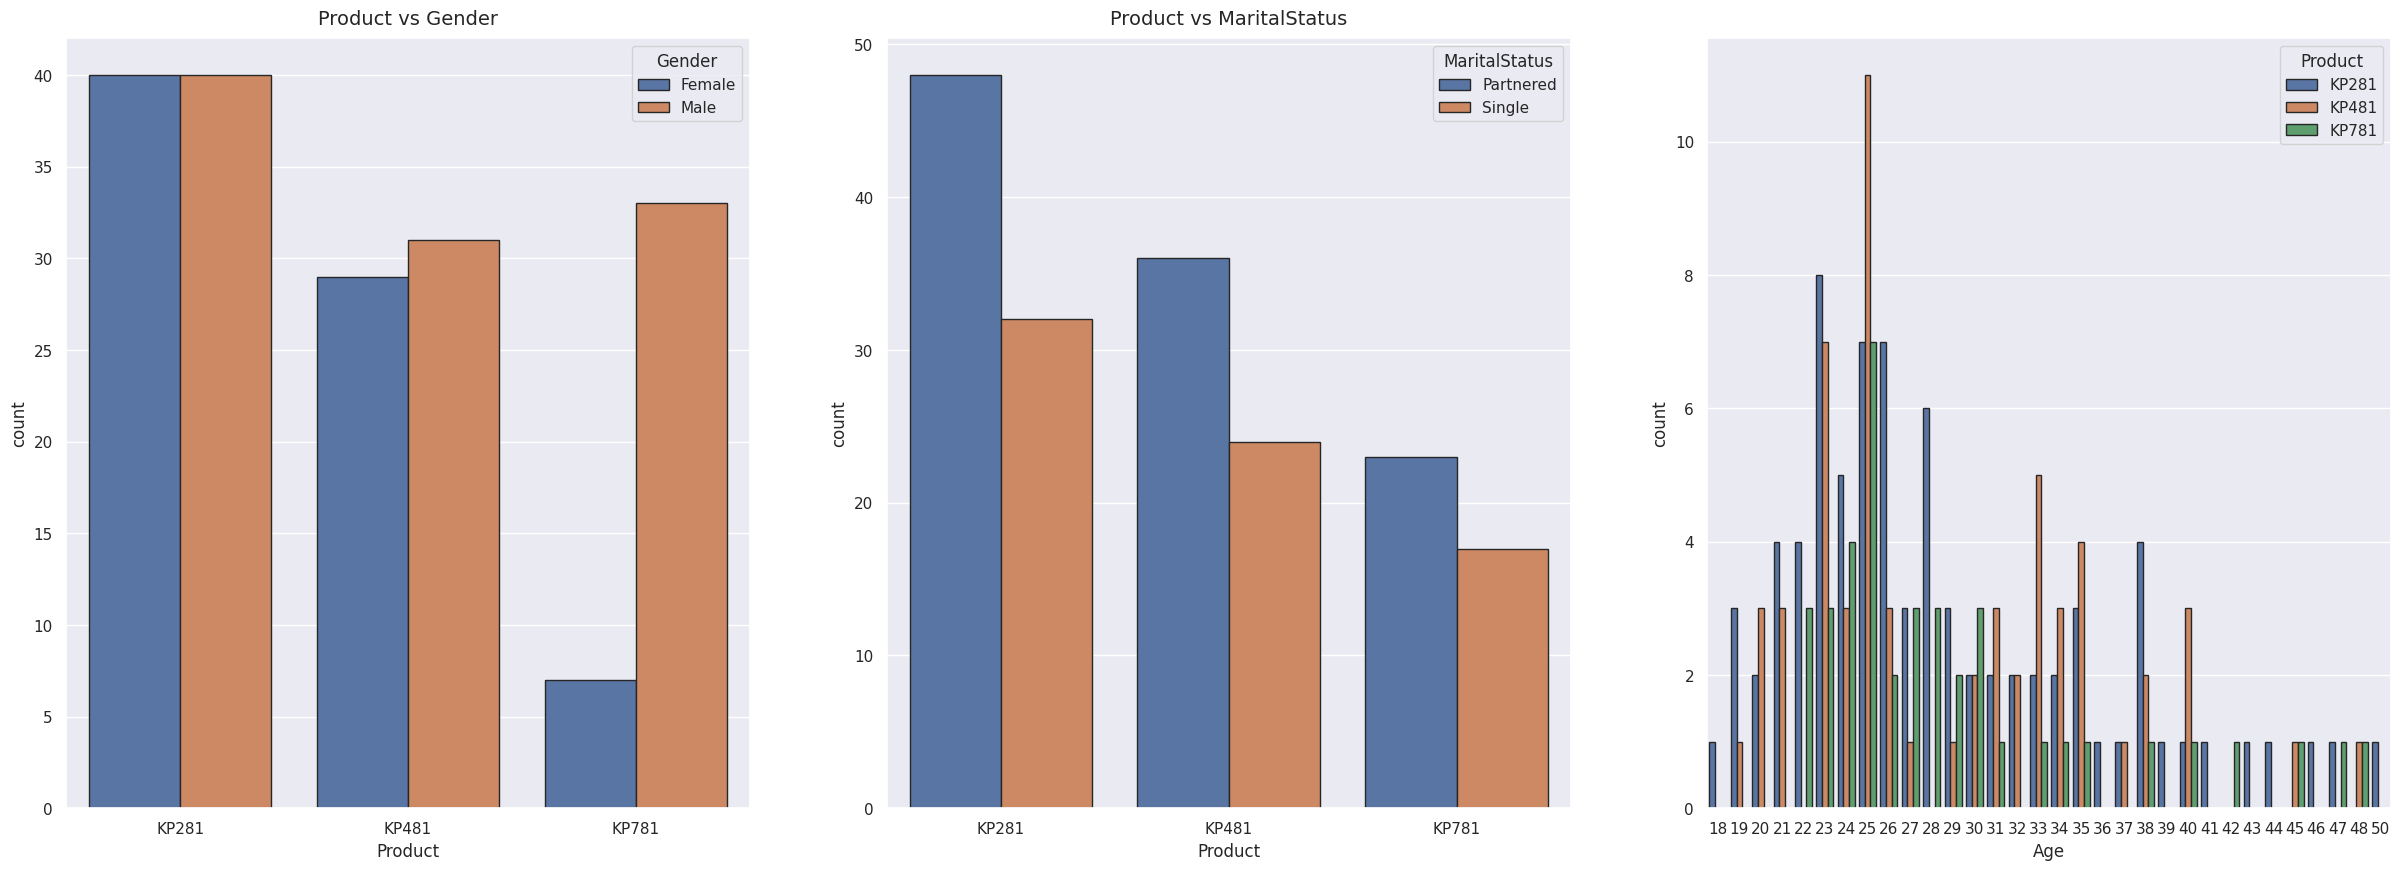

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=aerofit_df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=aerofit_df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=aerofit_df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Obervations**

**Product vs Gender**
Equal number of males and females have purchased KP281 product and Almost same for the product KP481
Most of the Male customers have purchased the KP781 product.

**Product vs MaritalStatus**

Customer who is Partnered, is more likely to purchase the product.

**Age vs Product**

Customers with age of 25 are more likely to purchase the KP481 product.

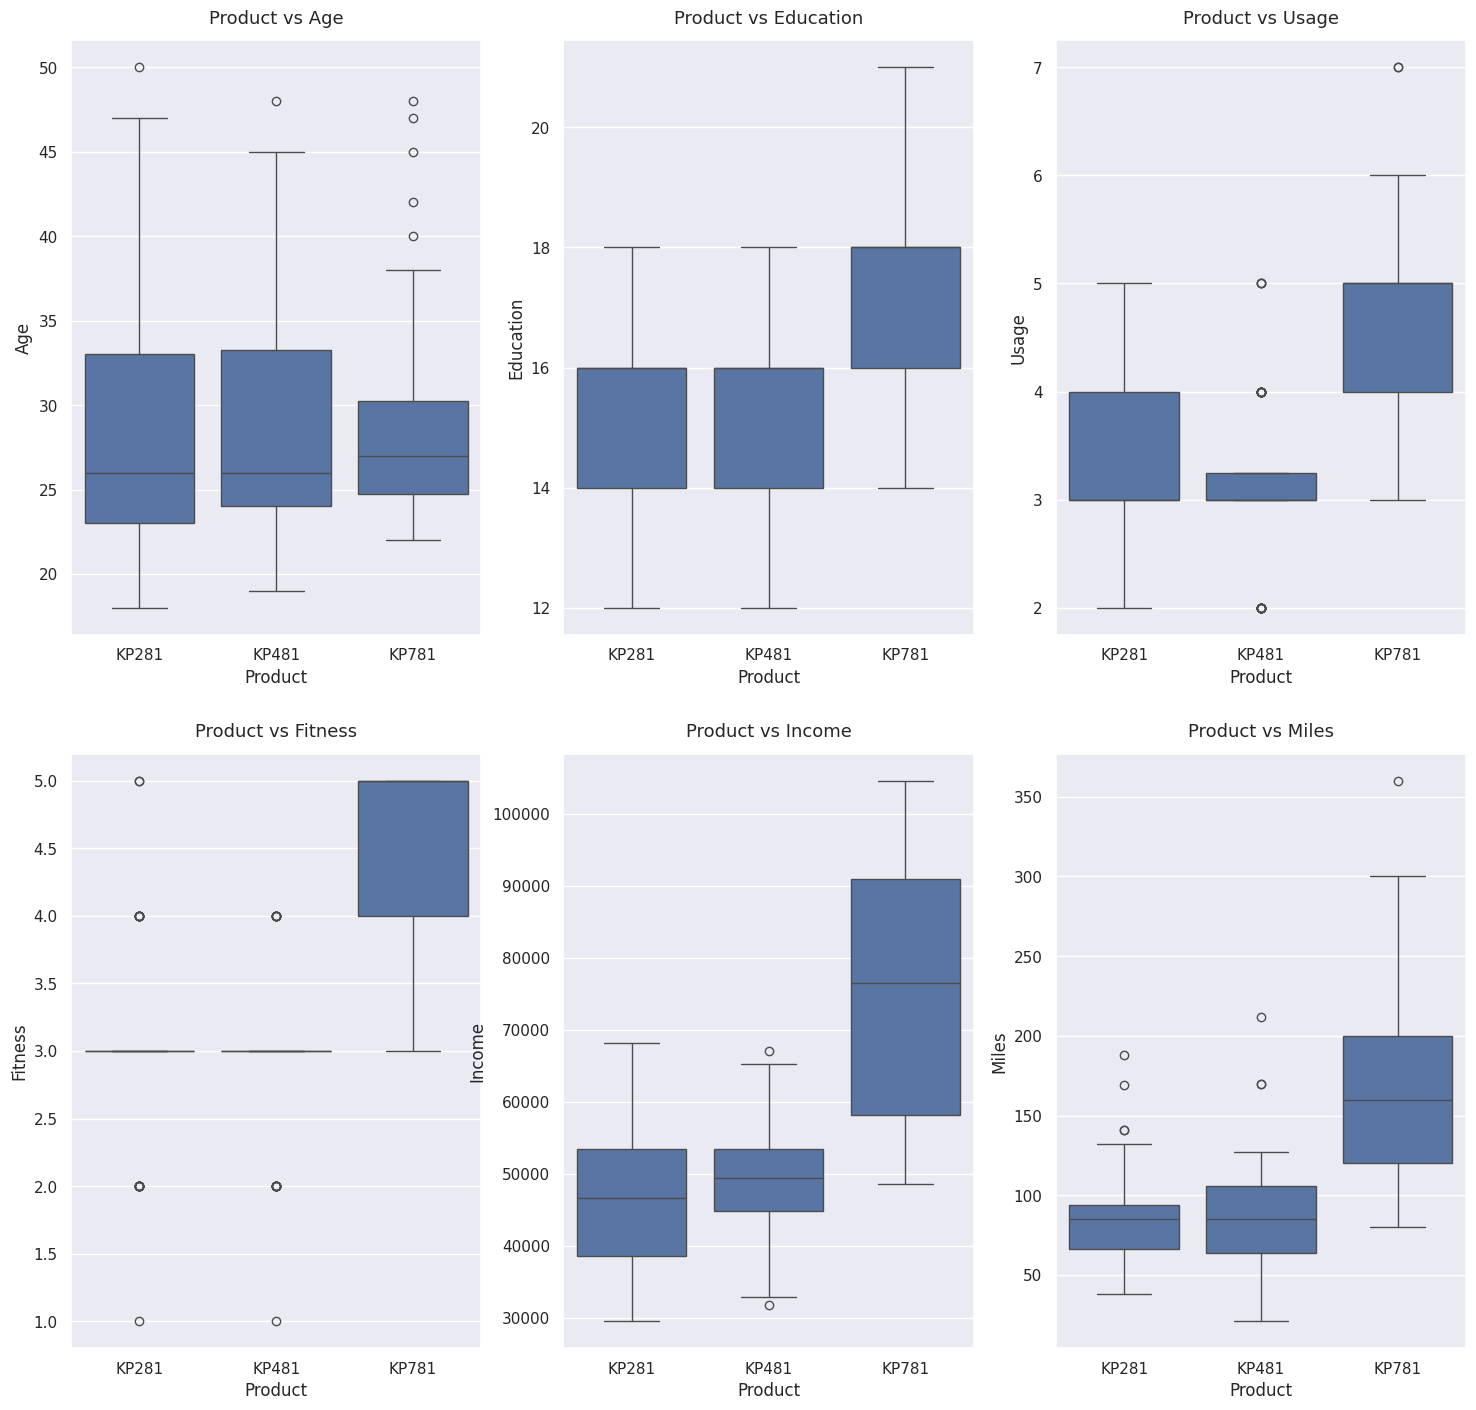

In [64]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=aerofit_df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

**Observations:**

**Product vs Age**
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy the KP781 product

**Product vs Education**

Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**Product vs Usage**

Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchase KP281 or KP481.

**Product vs Fitness**

The more the customer is fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.

**Product vs Income**

The higher the Income of the customer (Income >= 60000), the higher the chances of the customer purchasing the KP781 product.

**Product vs Miles**

If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

**Multivariate Analysis**

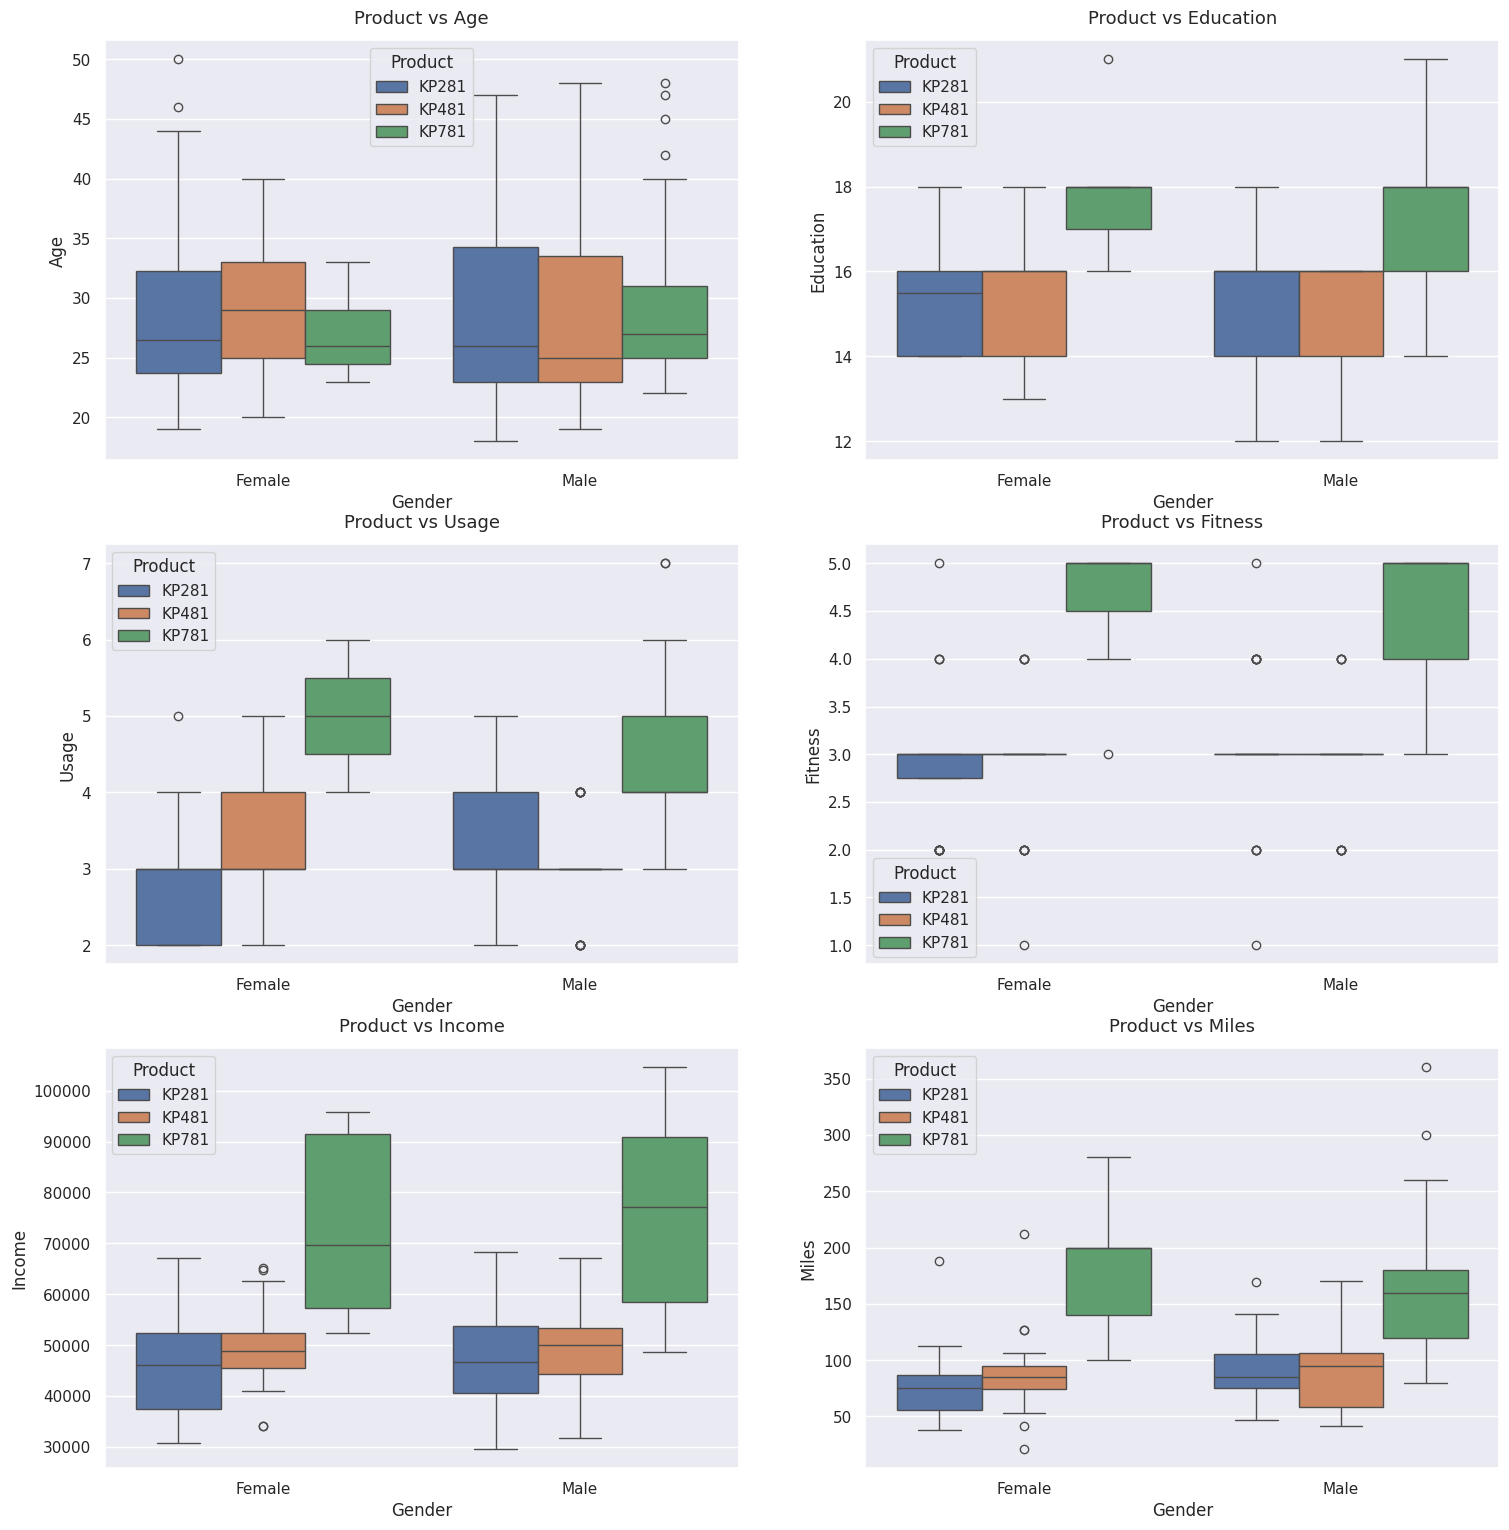

In [65]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit_df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

**Obervations**

Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481 product

**Correlation Analysis**

In [67]:
# Calculate covariance only for numerical columns
aerofit_df.select_dtypes(include=np.number).cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [69]:
aerofit_df.select_dtypes(include=np.number).corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


**Heatmaps**

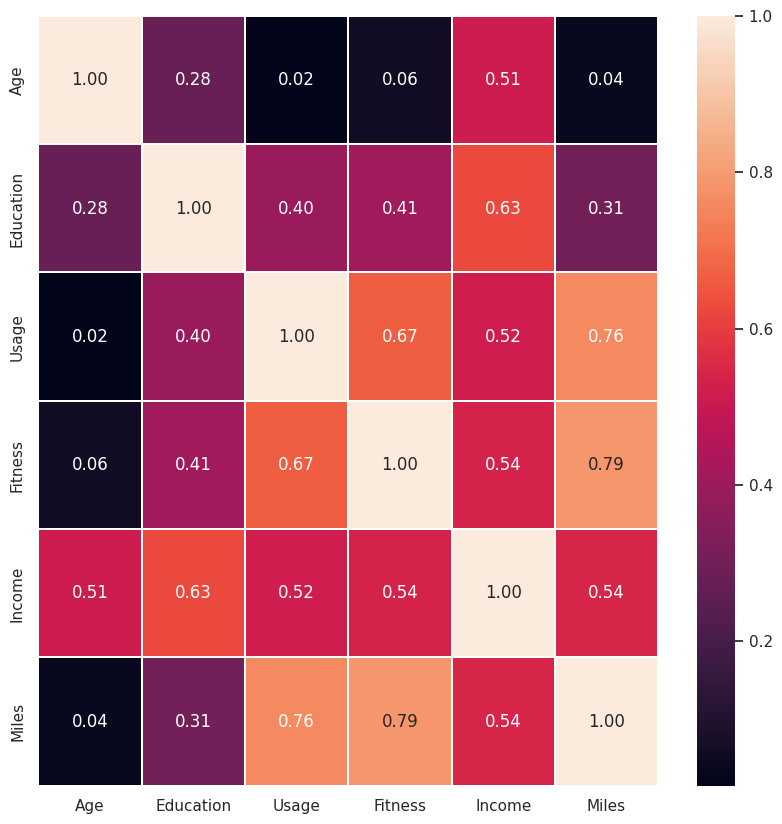

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap (aerofit_df.select_dtypes(include=np.number).corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

**Observations:**

(Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.

There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills

**Pair Plots**

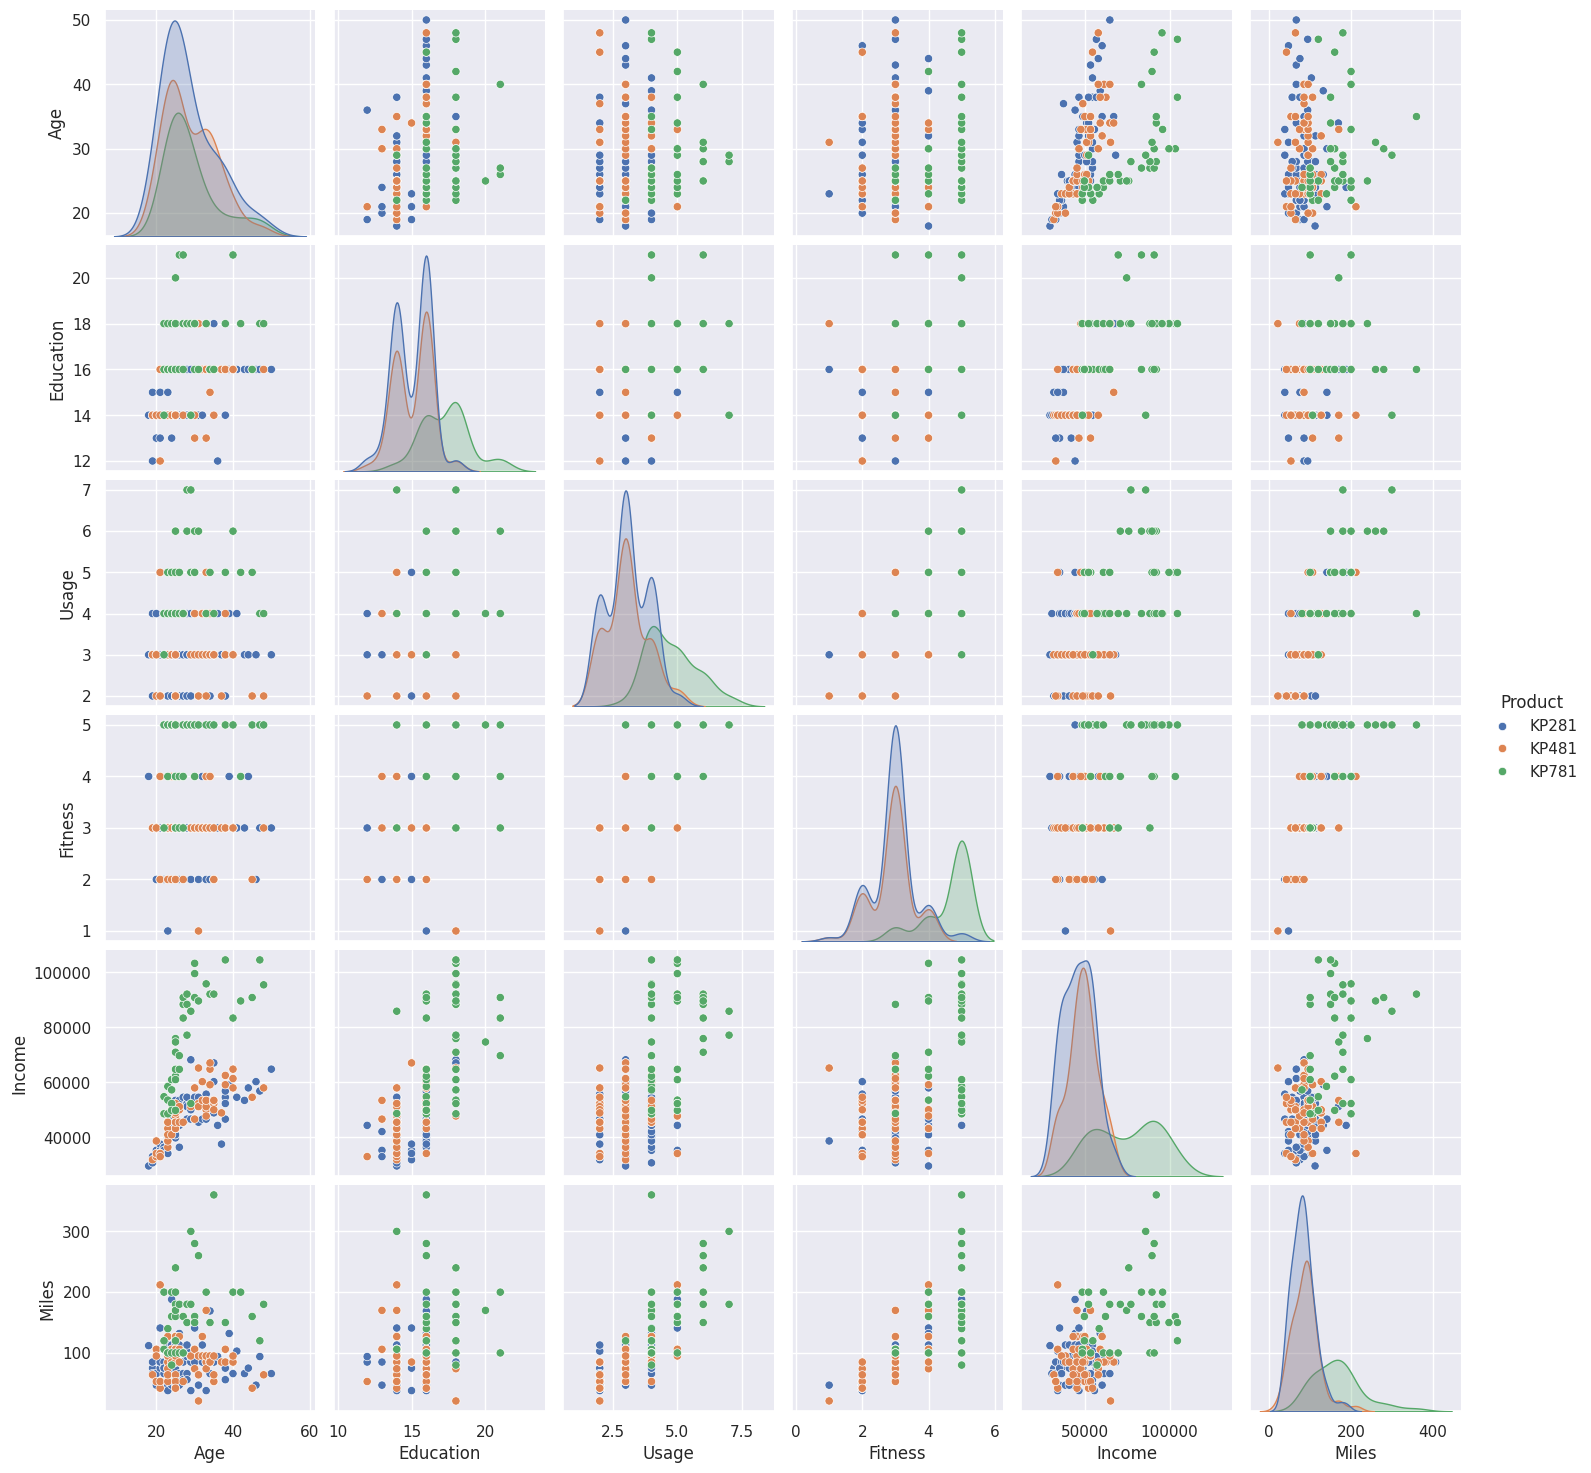

In [73]:
sns.pairplot(aerofit_df, hue = "Product")
plt.show()

**Marginal & Conditional Probabilities**

What percent of customers have purchased KP281, KP481, or KP781?

In [74]:
aerofit_df1 = aerofit_df[['Product', 'Gender', 'MaritalStatus']].melt()
(aerofit_df1.groupby(['variable', 'value'])[['value']].count() / len(aerofit_df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

**Obervations**

**Product**

44.44% of the customers have purchased KP281 product.
33.33% of the customers have purchased KP481 product.
22.22% of the customers have purchased KP781 product.

**Gender**

57.78% of the customers are Male.
MaritalStatus
59.44% of the customers are Partnered.

**What is the probability of a customer based on Gender ( Male or Female ) buying a certain treadmill Product?**

In [75]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."

    aerofit_df1 = pd.crosstab(index=aerofit_df['Gender'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][gender] / aerofit_df1.loc[gender].sum()
    p_481 = aerofit_df1['KP481'][gender] / aerofit_df1.loc[gender].sum()
    p_781 = aerofit_df1['KP781'][gender] / aerofit_df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {aerofit_df1.loc['Male'].sum()/len(aerofit_df):.2f}")
        print(f"P(Female): {aerofit_df1.loc['Female'].sum()/len(aerofit_df):.2f}\n")

    print(f"P(KP281/{gender}): {p_281:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



**What is the probability of a customer based on MaritalStatus ( Single or Partnered ) buying a certain treadmill Product?**

In [76]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."

    aerofit_df1 = pd.crosstab(index=aerofit_df['MaritalStatus'], columns=[aerofit_df['Product']])
    p_281 = aerofit_df1['KP281'][status] / aerofit_df1.loc[status].sum()
    p_481 = aerofit_df1['KP481'][status] / aerofit_df1.loc[status].sum()
    p_781 = aerofit_df1['KP781'][status] / aerofit_df1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {aerofit_df1.loc['Single'].sum()/len(aerofit_df):.2f}")
        print(f"P(Partnered): {aerofit_df1.loc['Partnered'].sum()/len(aerofit_df):.2f}\n")

    print(f"P(KP281/{status}): {p_281:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")

p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



**Product - Gender**

In [77]:
product_gender = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Gender']],margins=True)
product_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [78]:
# Percentage of a Male customer purchasing a treadmill
prob = round((product_gender['Male']['All'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

np.float64(58.0)

In [79]:
# Percentage of a Female customer purchasing KP781 treadmill
prob = round((product_gender['Female']['KP781'] / product_gender['All']['All']),2)
pct = round(prob*100,2)
pct

np.float64(4.0)

In [80]:
# Probability of a customer being a Female given that Product is KP281
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Female|KP281) = P(Female,KP281)/P(KP281)

prob = round((product_gender['Female']['KP281'] / product_gender['All']['KP281']),2)
pct = round(prob*100,2)
pct

np.float64(50.0)

**Observations:**

Female customer prefer to buy KP281 & KP481
50% of female tend to purchase treadmill model KP281

In [82]:
aerofit_df2 = aerofit_df.copy()

In [83]:
# Extracting 2 new features from Age:
# "AgeCategory" - Teens, 20s, 30s and Above 40s
# "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60

bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
aerofit_df2['AgeGroup'] = pd.cut(aerofit_df2['Age'], bins)
aerofit_df2['AgeCategory'] = pd.cut(aerofit_df2['Age'], bins,labels=labels)

In [84]:
aerofit_df2.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(40, 60]",Above 40s


In [85]:
product_age = pd.crosstab(index=aerofit_df2['Product'], columns=[aerofit_df2['AgeCategory']],margins=True)
product_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [86]:
# Percentage of customers with Age between 20s and 30s among all customers
prob = round((product_age['20s']['All'] / product_age['All']['All']),2)
pct = round(prob*100,2)
pct

np.float64(61.0)

**Observations:**

Teens don't prefer to buy KP781
61% of customers are wbetween 20 and 30 years old

**Product - Income**

In [87]:
aerofit_df3 = aerofit_df.copy()

In [88]:
# Extracting 1 new categorial feature based on the Income:
# "IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
aerofit_df3['IncomeCategory'] = pd.cut(aerofit_df3['Income'],bins_income,labels = labels_income)

In [89]:
aerofit_df3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle Income


In [90]:
product_income = pd.crosstab(index=aerofit_df3['Product'], columns=[aerofit_df3['IncomeCategory']],margins=True)
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [91]:
# Percentage of a low-income customer purchasing a treadmill
prob = round(product_income['Low Income']['All'] / product_income['All']['All'],2)
pct = round(prob*100,2)
pct

np.float64(8.0)

In [92]:
# Percentage of a high-income customer purchasing KP781 treadmill
prob = round(product_income['High Income']['KP781']/ product_income['All']['All'],2)
pct = round(prob*100,2)
pct

np.float64(9.0)

In [93]:
# Percentage of customer with high-income salary buying treadmill given that Product is KP781
prob = round(product_income['High Income']['KP781'] / product_income['All']['KP781'],2)
pct = round(prob*100,2)
pct

np.float64(42.0)

In [94]:
product_fitness = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['Fitness']],margins=True)
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [95]:
# Percentage of a customers having fitness level 5
prob = round((product_fitness[5]['All'] / product_fitness['All']['All']),2)
pct = round(prob*100,2)
pct

np.float64(17.0)

In [96]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill
prob = round((product_fitness[5]['KP781']/ product_fitness['All']['All']),2)
pct = round(prob*100,2)
pct

np.float64(16.0)

In [97]:
# Percentage of customer with fitness level 5 buying KP781 treadmill given that Product is KP781
prob = round((product_fitness[5]['KP781']/ product_fitness['All']['KP781']),2)
pct = round(prob*100,2)
pct # customers with fitness level 5 make up 72% of KP781 buyers

np.float64(72.0)

**Product - Marital Status**

In [98]:
product_marital = pd.crosstab(index=aerofit_df['Product'], columns=[aerofit_df['MaritalStatus']],margins=True)
product_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [99]:
# Percentage of a customers who are partnered using treadmills
prob = round((product_marital['Partnered']['All'] / product_marital['All']['All']),2)
pct = round(prob*100,2)
pct

np.float64(59.0)

**Outlier Detection**

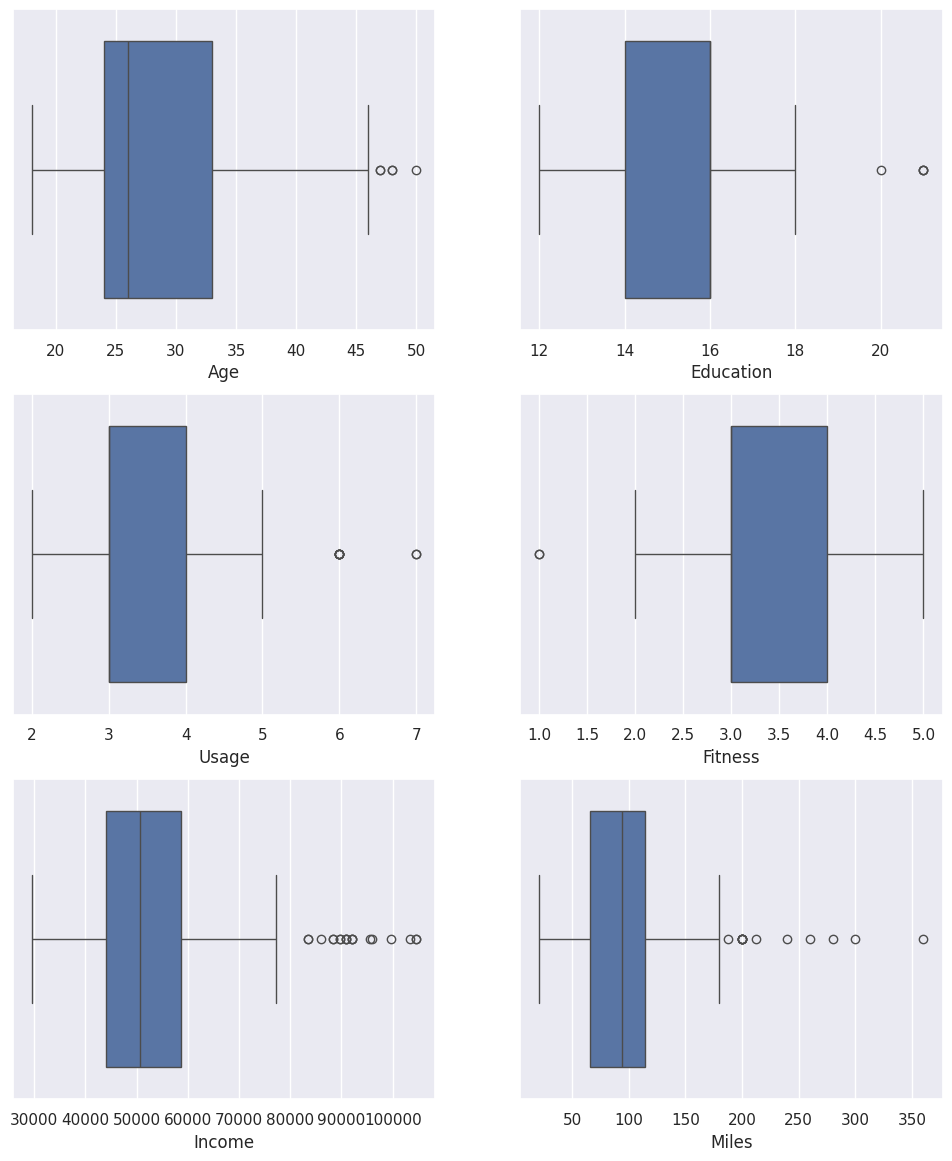

In [100]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=aerofit_df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=aerofit_df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=aerofit_df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=aerofit_df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=aerofit_df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=aerofit_df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

O**bervation**

Age, Education and Usage are having very few outliers.

Income and Miles are having more outliers.

Only a few of our customers run more than 180 miles per week

**Outlier Handling for Income Feature**

In [101]:
aerofit_df1 = aerofit_df.copy()

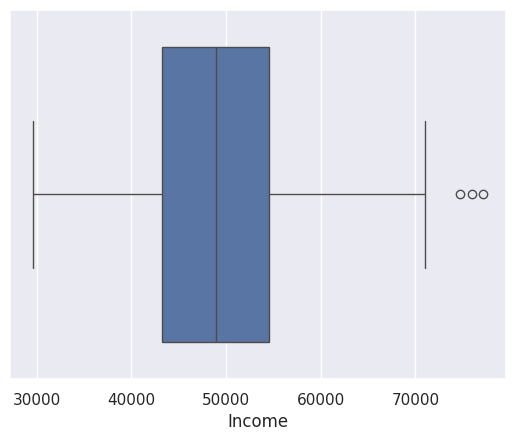

In [102]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = aerofit_df1['Income'].quantile(0.75)
Q1 = aerofit_df1['Income'].quantile(0.25)
IQR = Q3-Q1
aerofit_df1 = aerofit_df1[(aerofit_df1['Income'] > Q1 - 1.5*IQR) & (aerofit_df1['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=aerofit_df1, x="Income", orient='h')
plt.show()

**Outlier Handling for Miles Featur**e

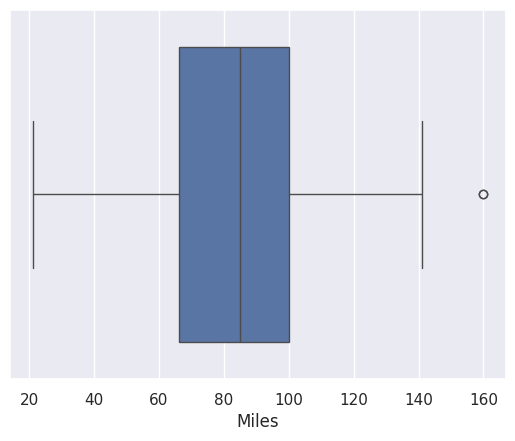

In [103]:
#Outlier Treatment: Removing top 5% & bottom 1% of the Column Outlier values
Q3 = aerofit_df1['Miles'].quantile(0.75)
Q1 = aerofit_df1['Miles'].quantile(0.25)
IQR = Q3-Q1
aerofit_df1 = aerofit_df1[(aerofit_df1['Miles'] > Q1 - 1.5*IQR) & (aerofit_df1['Miles'] < Q3 + 1.5*IQR)]

sns.boxplot(data=aerofit_df1, x="Miles", orient='h')
plt.show()

In [104]:
# Before removal of Outliers
aerofit_df.shape

(180, 9)

In [105]:
# After removal of Outliers
aerofit_df1.shape


(147, 9)

While there are outliers, they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis

**Actionable Insights & Recommendations**

**Actionable Insights:**

Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.

The majority of treadmill customers fall within the $ 45,000 - $ 80,000 income bracket.

83% of treadmills are bought by individuals with incomes between $ 35,000 and $ 85,000

There are only 8% of customers with incomes below $ 35000 who buy treadmills.
88% of treadmills are purchased by customers aged 20 to 40.

Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.

KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $ 85,000.

With Fitness level 4 and 5, the customers tend to use high-end treadmills and the average number of miles is above 150 per week

**Recommendations:**

KP281 & KP481 are popular with customer income of $ 45,000 - $ 60,000 and can be offered by these companies as affordable models.

KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 20 years market segments could result in more sales.

The KP781 is a premium model, so it is ideally suited for sporty people who have a high average weekly mileage and can be afforded by the high income customers.

Aerofit should conduct market research to determine if it can attract customers with income under $ 35,000 to expand its customer base.